# ORB : Orinted FAST and Rotated BRIEF
# FAST: Features from Accelretaed Segments test
# BRIEF: Binary Robust Independent Elementary Features

## Import Libraries

In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

# Image Pyramid

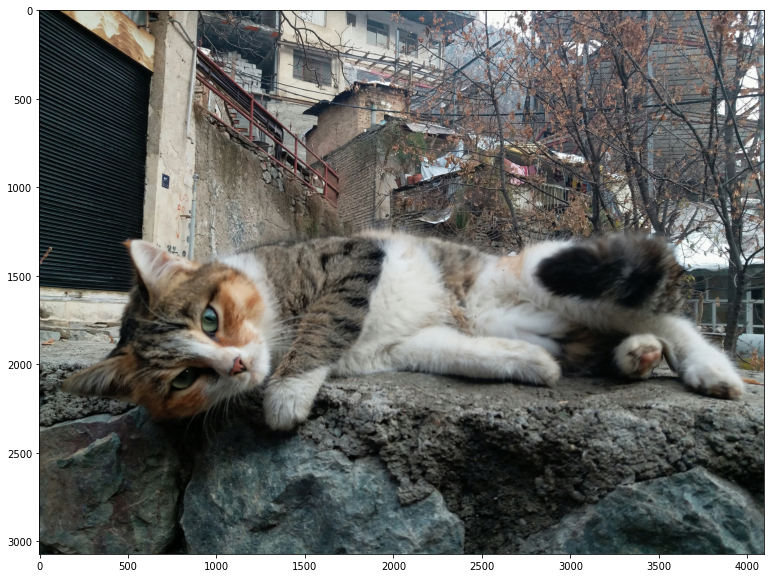

In [34]:
bgr = cv2.imread("20221216_104836 (2).jpg")
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
gray= cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
plt.figure(figsize= (15,10))
plt.imshow(rgb)

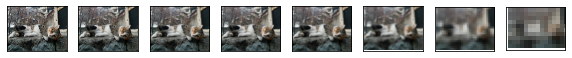

In [31]:
def pyrdown(ax, image, name):
    level = cv2.pyrDown(image)
    # ax.set_title(name)
    ax.set_xlim(level.shape[1])
    ax.set_ylim(level.shape[0])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(level)
    return level
lev_count= 8
f, ax = plt.subplots(1,lev_count, figsize = (10,20))

name = ["original"] + ["level{}".format(i) for i in range(lev_count) ]
level = rgb
for i in range(lev_count):
    level = pyrdown(ax[i],level, name[i])

# locating keypoints

* **nfeatures** - *int*  
Determines the maximum number of features (keypoints) to locate.


* **scaleFactor** - *float*  
Pyramid decimation ratio, must be greater than 1. ORB uses an image pyramid to find features, therefore you must provide the scale factor between each layer in the pyramid and the number of levels the pyramid has. A `scaleFactor = 2` means the classical pyramid, where each next level has 4x less pixels than the previous. A big scale factor will diminish the number of features found.


* **nlevels** - *int*  
The number of pyramid levels. The smallest level will have a linear size equal to input_image_linear_size/pow(scaleFactor, nlevels).


* **edgeThreshold** - - *int*  
The size of the border where features are not detected. Since the keypoints have a specific pixel size, the edges of images must be excluded from the search. The size of the `edgeThreshold` should be equal to or greater than the patchSize parameter.


* **firstLevel** - *int*  
This parameter allows you to determine which level should be treated as the first level in the pyramid. It should be 0 in the current implementation. Usually, the pyramid level with a scale of unity is considered the first level.


* **WTA_K** - *int*  
The number of random pixels used to produce each element of the oriented BRIEF descriptor. The possible values are 2, 3, and 4, with 2 being the default value. For example, a value of 3 means three random pixels are chosen at a time to compare their brightness. The index of the brightest pixel is returned. Since there are 3 pixels, the returned index will be either 0, 1, or 2.


* **scoreType** - *int*  
This parameter can be set to either HARRIS_SCORE or FAST_SCORE. The default HARRIS_SCORE means that the Harris corner algorithm is used to rank features. The score is used to only retain the best features. The FAST_SCORE produces slightly less stable keypoints, but it is a little faster to compute.


* **patchSize** - *int*  
Size of the patch used by the oriented BRIEF descriptor. Of course, on smaller pyramid layers the perceived image area covered by a feature will be larger.

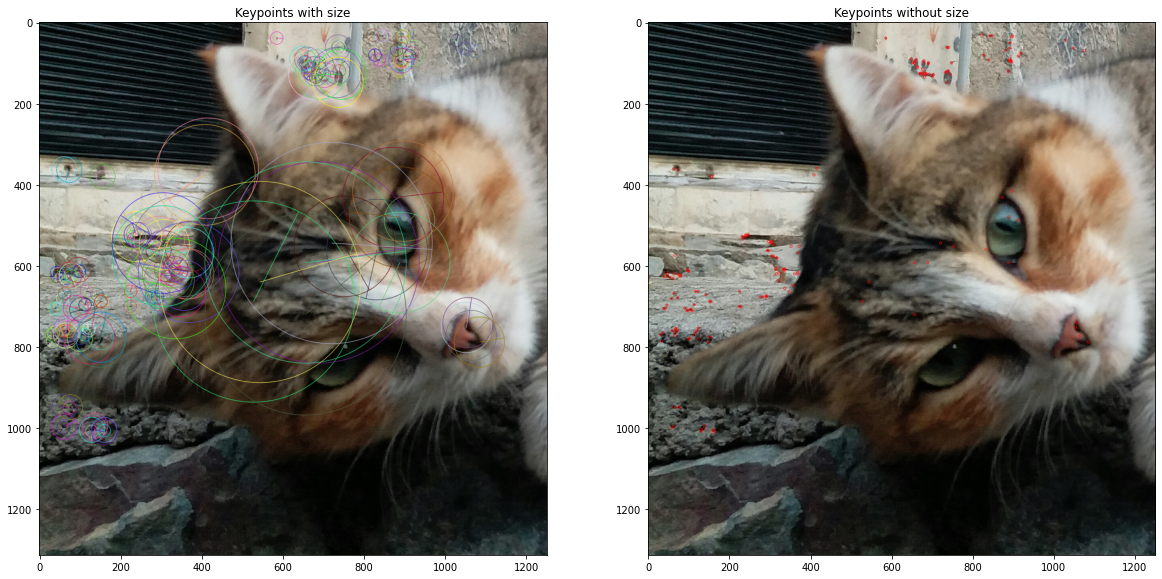

In [43]:
bgr = cv2.imread("cat_head.jpg")
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
gray= cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY) 

# set the figure size
plt.rcParams['figure.figsize'] = (20,10)

# ORB algorithm (nFeatures, ScaleFactor)
orb = cv2.ORB_create(200,2.0)

# Find the Keypoints and Descriptors 
# None for not using mask
keypoints, descriptors = orb.detectAndCompute(gray, None)

keypoints_with_size = np.copy(rgb)
keypoints_without_size = np.copy(rgb)

# Draw keypoints on the image
cv2.drawKeypoints(rgb, keypoints, keypoints_without_size, color=(255,0,0))
cv2.drawKeypoints(rgb, keypoints, keypoints_with_size ,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show the images
f, ax = plt.subplots(1,2, figsize = (20,10))
ax[0].set_title("Keypoints with size")
ax[0].imshow(keypoints_with_size)
ax[1].set_title("Keypoints without size")
ax[1].imshow(keypoints_without_size)

# Feature matching

In [93]:
def feature_matching(rgb_train, rgb_query,match_n):
    gray_train = cv2.cvtColor(rgb_train, cv2.COLOR_RGB2GRAY)
    gray_query = cv2.cvtColor(rgb_query, cv2.COLOR_RGB2GRAY)

    # ORB algorithm (nFeatures, ScaleFactor)
    orb = cv2.ORB_create(5000,2.0) 

    # find the keypoints and descriptors
    keypoints_train, descriptors_train = orb.detectAndCompute(gray_train, None)
    keypoints_query, descriptors_query = orb.detectAndCompute(gray_query, None)

    # create BFMatcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck= True)

    matches = bf.match(descriptors_train, descriptors_query)

    # Sort them in the order of their distance (need shorter distances)
    matches = sorted(matches, key = lambda x:x.distance)
    
    result = cv2.drawMatches(gray_train, keypoints_train, gray_query, keypoints_query, matches[:match_n], gray_query, flags=2)

    plt.figure(figsize = (20,10))
    plt.imshow(result)
    plt.show()

    # Print the number of keypoints detected in the training image
    print("Number of Keypoints Detected In The Training Image: ", len(keypoints_train))

    # Print the number of keypoints detected in the query image
    print("Number of Keypoints Detected In The Query Image: ", len(keypoints_query))

    # Print total number of matching points between the training and query images
    print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))



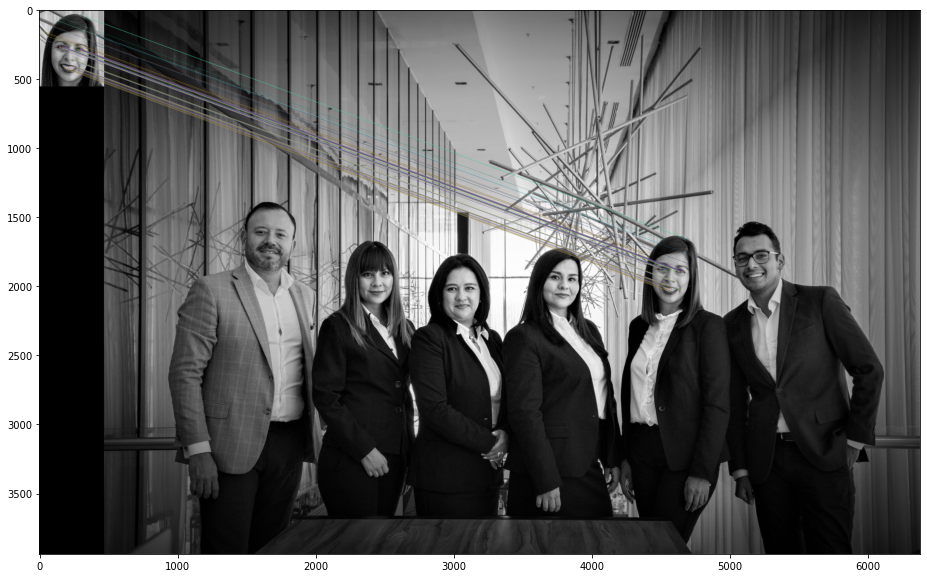

Number of Keypoints Detected In The Training Image:  2504
Number of Keypoints Detected In The Query Image:  4941

Number of Matching Keypoints Between The Training and Query Images:  662


In [88]:
rgb_train = cv2.cvtColor(cv2.imread("face.jpeg"), cv2.COLOR_BGR2RGB)
rgb_query = cv2.cvtColor(cv2.imread("Team.jpeg"), cv2.COLOR_BGR2RGB)

feature_matching(rgb_train, rgb_query,80)

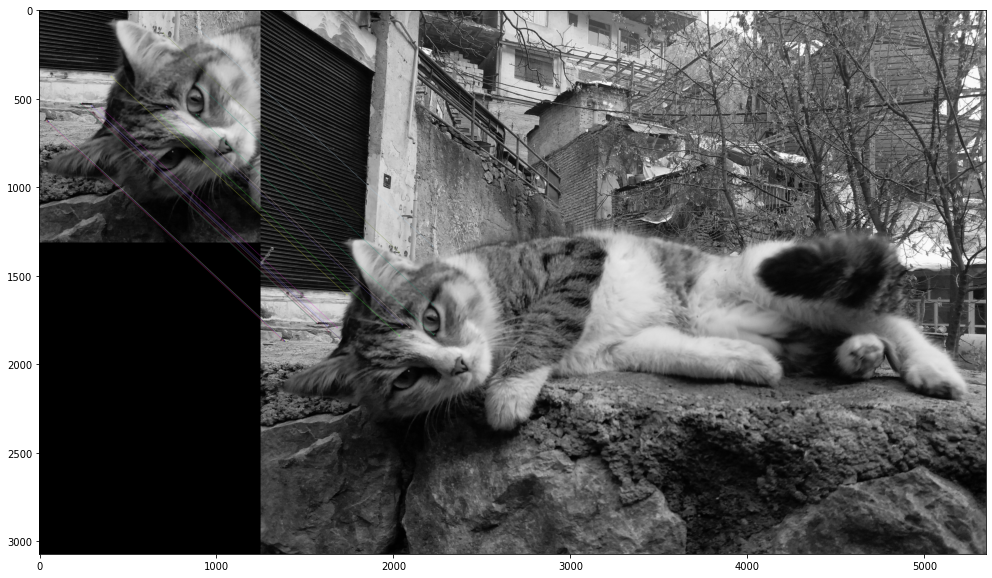

Number of Keypoints Detected In The Training Image:  4599
Number of Keypoints Detected In The Query Image:  4941

Number of Matching Keypoints Between The Training and Query Images:  1297


In [94]:
rgb_train = cv2.cvtColor(cv2.imread("cat_head.jpg"), cv2.COLOR_BGR2RGB)
rgb_query = cv2.cvtColor(cv2.imread("20221216_104836 (2).jpg"), cv2.COLOR_BGR2RGB)

feature_matching(rgb_train, rgb_query,20)

## Scale Invariance

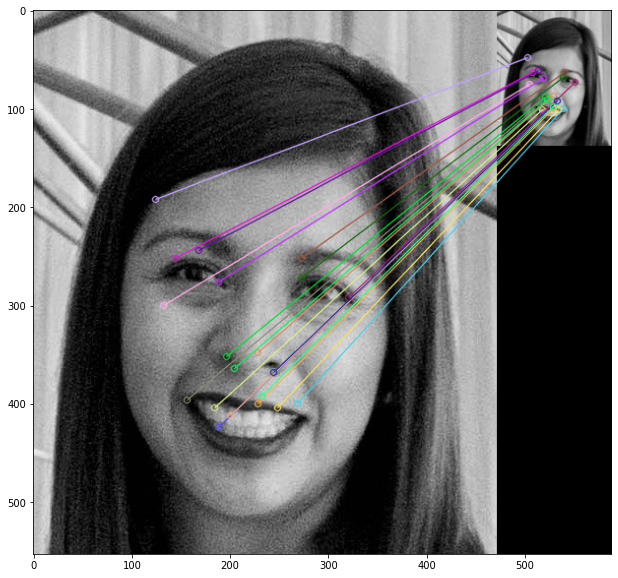

Number of Keypoints Detected In The Training Image:  2504
Number of Keypoints Detected In The Query Image:  67

Number of Matching Keypoints Between The Training and Query Images:  59


In [95]:
rgb_train = cv2.cvtColor(cv2.imread("face.jpeg"), cv2.COLOR_BGR2RGB)
rgb_query = cv2.cvtColor(cv2.imread("faceQS.png"), cv2.COLOR_BGR2RGB)

feature_matching(rgb_train, rgb_query,20)

## Rotational Invariance

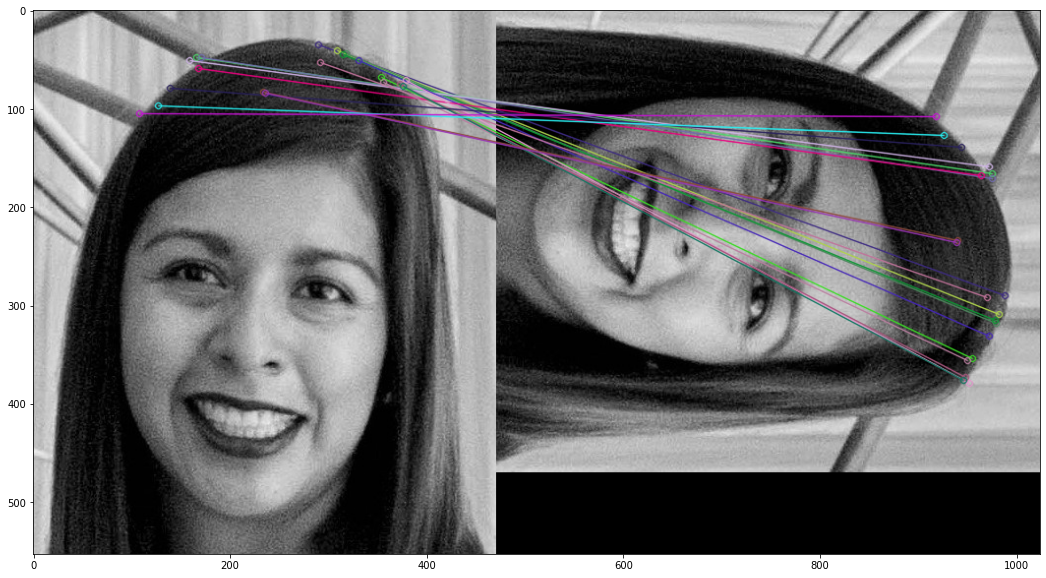

Number of Keypoints Detected In The Training Image:  2504
Number of Keypoints Detected In The Query Image:  2526

Number of Matching Keypoints Between The Training and Query Images:  1895


In [97]:
rgb_train = cv2.cvtColor(cv2.imread("face.jpeg"), cv2.COLOR_BGR2RGB)
rgb_query = cv2.cvtColor(cv2.imread("faceR.jpeg"), cv2.COLOR_BGR2RGB)

feature_matching(rgb_train, rgb_query,20)

## Ilumination Invariance

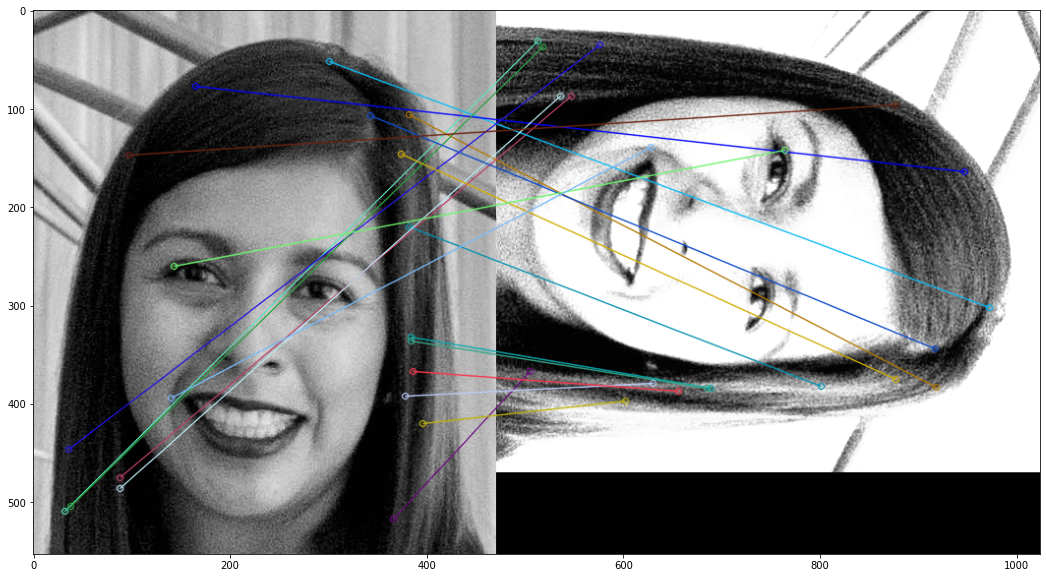

Number of Keypoints Detected In The Training Image:  2504
Number of Keypoints Detected In The Query Image:  3538

Number of Matching Keypoints Between The Training and Query Images:  1265


In [98]:
rgb_train = cv2.cvtColor(cv2.imread("face.jpeg"), cv2.COLOR_BGR2RGB)
rgb_query = cv2.cvtColor(cv2.imread("faceRI.png"), cv2.COLOR_BGR2RGB)

feature_matching(rgb_train, rgb_query,20)

## Noise Invariance

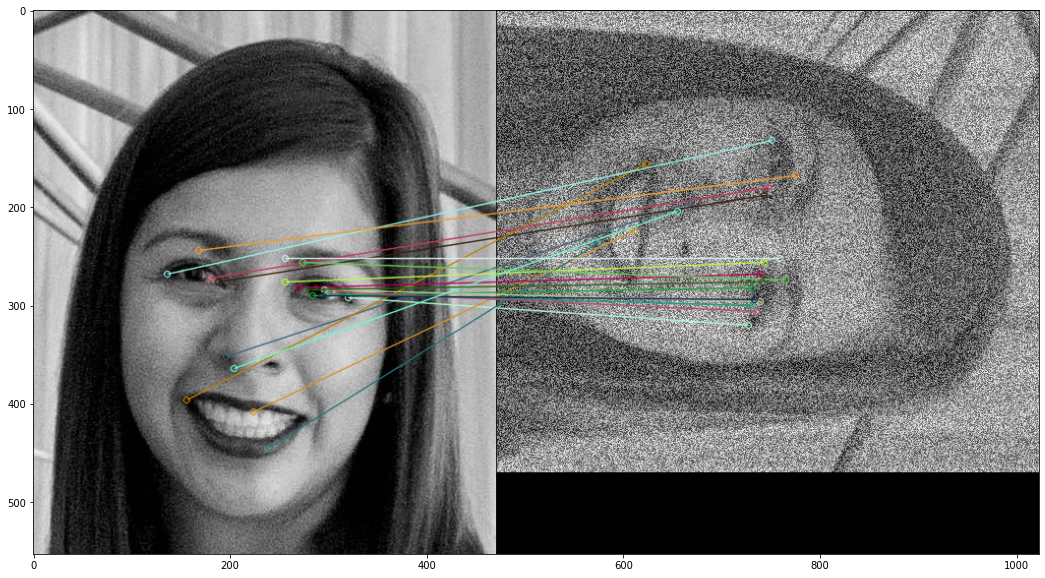

Number of Keypoints Detected In The Training Image:  2504
Number of Keypoints Detected In The Query Image:  3969

Number of Matching Keypoints Between The Training and Query Images:  626


In [99]:
rgb_train = cv2.cvtColor(cv2.imread("face.jpeg"), cv2.COLOR_BGR2RGB)
rgb_query = cv2.cvtColor(cv2.imread("faceRN5.png"), cv2.COLOR_BGR2RGB)

feature_matching(rgb_train, rgb_query,20)